# <font color="red">**Progetto: Un modello per l’identificazione della lingua di testi per un museo**</font>

## <font color="orange">**Master: Master in AI Development**</font>

## <font color="orange">**Modulo: A.I. applicata per Sviluppatori**</font>

## <font color="orange">**Studente: Giacomo Latini**</font>

## <font color="orange">**Specifiche del Progetto**</font>

**Modello per l'Identificazione della Lingua di Testi per un Museo**

**Caso d'Uso Aziendale: MuseumLangID**

---

**Introduzione all'Azienda:**

MuseumLangID è un'iniziativa di un museo internazionale che ospita una vasta collezione di opere d'arte e manufatti. Le descrizioni degli oggetti sono spesso scritte in diverse lingue, e il personale del museo ha bisogno di uno strumento automatizzato per identificare rapidamente la lingua di questi testi.

**Problema:**

La gestione delle informazioni multilingue è una sfida significativa per il museo. Attualmente, la lingua di ogni descrizione deve essere identificata manualmente, il che richiede tempo e può portare a errori. Con l'espansione delle collezioni, il numero di testi da analizzare aumenta, rendendo necessario un approccio automatizzato e scalabile.

**Obiettivo del Progetto:**

L'obiettivo è sviluppare un modello di machine learning basato su tecniche di Natural Language Processing (NLP) per identificare la lingua di testi forniti dal museo. Questo modello dovrà:
1. Riconoscere automaticamente la lingua di un testo.
2. Supportare almeno 3 lingue principali.
3. Essere facile da integrare con il sistema esistente del museo.

**Benefici Attesi:**
* **Automazione:** Eliminare la necessità di identificazione manuale delle lingue.
* **Efficienza:** Processare rapidamente grandi volumi di testi.
* **Accuratezza:** Ridurre gli errori umani nell'identificazione delle lingue.

---

**Specifiche del Progetto:**
* **Dataset:** Il dataset è disponibile a questo link: https://raw.githubusercontent.com/Profession-AI/progetti-ml/refs/heads/main/Modello%20per%20l'identificazione%20della%20lingua%20dei%20testi%20di%20un%20museo/museo_descrizioni.csv. Contiene varie descrizioni in più lingue, con una colonna che rappresenta il codice della lingua, che è il target da prevedere.
* **Tecnologie:**
  * Linguaggio di programmazione: Python
  * Librerie richieste:
    * scikit-learn
    * nltk
    * numpy
    * pandas

---

**Funzionalità Chiave:**
1. **Preprocessing dei Dati:**
  * Pulizia del testo (rimozione di caratteri speciali, normalizzazione).
  * Tokenizzazione e rappresentazione dei testi in un formato numerico (ad esempio, Bag of Words o TF-IDF).
2. **Sviluppo del Modello:**
  * Creazione di un modello di classificazione delle lingue basato su algoritmi di machine learning (ad esempio, Naive Bayes, Support Vector Machine o Random Forest).
  * Addestramento e validazione del modello sul dataset fornito.
3. **Valutazione:**
  * Utilizzare metriche come accuratezza, precisione, richiamo e F1-score per valutare le prestazioni del modello.

## <font color="orange">**Progetto**</font>

Definizione delle librerie + eventuali moduli, con relative classi e funzioni:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re

Definizione delle costanti:
* RANDOM_SEED: costante che verrà passata al parametro random_state, per la generazione di dati casuali
* BASE_PATH: percorso (url) al dataset di riferimento

In [ ]:
RANDOM_SEED = 0
BASE_PATH = "https://raw.githubusercontent.com/Profession-AI/progetti-ml/refs/heads/main/Modello%20per%20l'identificazione%20della%20lingua%20dei%20testi%20di%20un%20museo/"

### <font color="yellow">**Preprocessing dei dati**</font>

Utilizzo della funzione read_csv(), della libreria Pandas, per la lettura del file.csv contenente il dataset con le descrizioni delle opere d'arte e manufatti presenti nel museo MuseumLangID, in tre diverse lingue: italiano, inglese e tedesco

In [ ]:
df_museum = pd.read_csv(BASE_PATH + "museo_descrizioni.csv")

Dall'output si possono notare due variabili:
* Testo: feature che indica la descrizione delle opere d'arte e manufatti
* Codice Lingua: target che indica la lingua delle descrizioni delle opere d'arte e manufatti

In [ ]:
df_museum

,Testo,Codice Lingua
0,Statua in marmo di un imperatore romano del II...,it
1,Anfora greca con decorazioni a figure nere,it
2,Dipinto rinascimentale raffigurante la Madonna...,it
3,Elmo corinzio in bronzo del VI secolo a.C.,it
4,Manoscritto medievale con miniature dorate,it
...,...,...
289,Wikinger-Anhänger mit Darstellung von Thor,de
290,Päpstliches Bleisiegel mit dem Bild des Heilig...,de
291,Leder-Gürtel mit langobardischer Bronzeschließe,de
292,Renaissance-Kupferbecken mit pflanzlichen Must...,de


Dalle funzioni info() e isna().sum(), applicate sull'intero dataset, si può notare che il dataset non contiene valori mancanti (o nulli), quindi non si dovrà applicare nessuna operazione di eliminazione di righe/colonne oppure imputazione(detta anche sostituzione) di valori mancanti con il valore della moda (dato che si hanno due variabili qualitative)

In [ ]:
print(df_museum.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Testo          294 non-null    object
 1   Codice Lingua  294 non-null    object
dtypes: object(2)
memory usage: 4.7+ KB
None


In [ ]:
print(df_museum.isna().sum())

Testo            0
Codice Lingua    0
dtype: int64


Dalla funzione unique(), applicata sulla Series 'Codice Lingua', si possono notare solo tre valori:
* it -> classe associata alle descrizioni in lingua italiana
* en -> classe associata alle descrizioni in lingua inglese
* de -> classe associata alle descrizioni in lingua tedesca

In [ ]:
print(df_museum['Codice Lingua'].unique())

['it' 'en' 'de']


Dalla funzione value_counts(), applicata sulla Series 'Codice Lingua', si può notare un dataset bilanciato con 98 samples su ciascuna descrizione in lingua diversa

In [ ]:
print(df_museum['Codice Lingua'].value_counts())

Codice Lingua
it    98
en    98
de    98
Name: count, dtype: int64


Funzione per effettuare Data Preprocessing sulle descrizioni delle opere museali/manufatti, con i seguenti passaggi:
1. *Rimozione di eventuali valori numerici*, usando la funzione sub() della libreria re(=regular expression), sostituendo tutte le occorrenze di un pattern (espresso come espressione regolare) all'interno di una stringa con un’altra stringa specificata
2. *Rimozione di eventuali URL*, usando la funzione sub() della libreria re(=regular expression), sostituendo tutte le occorrenze di un pattern (espresso come espressione regolare) all'interno di una stringa con un’altra stringa specificata.
3. *Rimozione della punteggiatura*, usando string.punctuation(string.punctuation: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~) iterando su ciascun carattere speciale e se presente nella descrizione, sostituirlo con una stringa con carattere vuoto tramite la funzione replace().
4. *Lower casing* su tutte le parole di ciascuna descrizione, portandole in lettera minuscola.

In [ ]:
def data_cleaner(description):

    """
    Funzione per effettuare data preprocessing sulle descrizioni delle opere museali/manufatti, con i seguenti passaggi:
    1. Rimozione di eventuali numeri
    2. Rimozione di eventuali URL
    3. Rimozione della punteggiatura
    4. Lower casing

    Input: description (class 'pandas.core.series.Series') -> descrizioni presenti nella Series 'Testo'
    Output: description (class 'pandas.core.series.Series') -> descrizioni presenti nella Series 'Testo' pre-processate
    """

    # rimozione di eventuali numeri
    # sostituisce tutte le sequenze numeri con stringa vuota
    description = re.sub(r'\d+', '', description)

    # rimozione di eventuali URL
    # rimuove tutti gli URL che iniziano con "http", "https" o "www", seguiti da caratteri senza spazi (cioè fino al prossimo spazio)
    description = re.sub(r'http\S+|www\S+|https\S+', '', description)

    # rimozione della punteggiatura
    for c in string.punctuation:
        description = description.replace(c, ' ')

    # lowercasing, portando le parole in lettera minuscola
    description = description.lower()

    return description

In [ ]:
descriptions_cleaned = df_museum['Testo'].apply(data_cleaner)

In [ ]:
descriptions_cleaned

,Testo
0,statua in marmo di un imperatore romano del ii...
1,anfora greca con decorazioni a figure nere
2,dipinto rinascimentale raffigurante la madonna...
3,elmo corinzio in bronzo del vi secolo a c
4,manoscritto medievale con miniature dorate
...,...
289,wikinger anhänger mit darstellung von thor
290,päpstliches bleisiegel mit dem bild des heilig...
291,leder gürtel mit langobardischer bronzeschließe
292,renaissance kupferbecken mit pflanzlichen must...


Andiamo a selezionare e convertire in un array numpy monodimensionale:
* la variabile descriptions_cleaned, con le descrizioni pre-processate, associandogli la variabile X
* 'Codice Lingua', che sarebbe la variabile target, associandogli la variabile y

In [ ]:
# X: array numpy monodimemsionale, con le feature pre-processate presenti nella variabile descriptions_cleaned
X = descriptions_cleaned.values
# y: array numpy monodimensionale, con i target della variabile Codice Lingua
y = df_museum['Codice Lingua'].values

In [ ]:
print(X)

['statua in marmo di un imperatore romano del ii secolo'
 'anfora greca con decorazioni a figure nere'
 'dipinto rinascimentale raffigurante la madonna con il bambino'
 'elmo corinzio in bronzo del vi secolo a c '
 'manoscritto medievale con miniature dorate'
 'scultura lignea gotica di un santo'
 'spada vichinga con impugnatura decorata'
 'maschera funeraria egizia in oro'
 'tavoletta sumera con incisioni cuneiformi'
 'vaso cinese della dinastia ming con smalti blu e bianchi'
 'affresco pompeiano con scena mitologica'
 'arpa barocca in legno intagliato e dorato'
 'moneta d argento dell impero bizantino'
 'armatura completa da cavaliere del xv secolo'
 'fusaiola neolitica decorata' 'mosaico romano con motivi geometrici'
 'scultura in bronzo raffigurante eracle'
 'brocca etrusca con iscrizioni in alfabeto etrusco'
 'pettine in osso dell epoca vichinga'
 'elmo samurai con cresta ornamentale' 'anello sigillo dell antico egitto'
 'tappeto persiano del xvii secolo con disegni floreali'
 'pe

In [ ]:
print(y)

['it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it'
 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it'
 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it'
 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it'
 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it'
 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it'
 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it' 'it'
 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en'
 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en'
 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en'
 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en'
 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en'
 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en'
 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en' 'en'
 'de' 

Applicazione della tecnica di Cross Validation->Hold-out, per la suddivisione del dataset in set di addestramento(train) e test, associando il 20% dei pesi al test_set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [ ]:
print(f"shape X_train: {X_train.shape}")
print(f"shape X_test: {X_test.shape}")
print(f"shape y_train: {y_train.shape}")
print(f"shape y_test: {y_test.shape}")

shape X_train: (235,)
shape X_test: (59,)
shape y_train: (235,)
shape y_test: (59,)


I dati contenuti in X_train e X_test sono rappresentati da descrizioni (che sono dati testuali non strutturati), pertanto è necessario convertirli in una forma numerica e strutturata per poterli utilizzare in un modello di Machine Learning. Una tecnica comunemente usata nel Natural Language Processing (NLP) è il modello Bag of Words (BoW). Questo approccio consente di rappresentare ciascuna descrizione di opera museale/manufatto come un vettore, che conta la frequenza di ogni parola ignorando l’ordine in cui compaiono i termini.

Il modello Bag of Words si basa su due concetti chiave:
1. Vocabolario: l’insieme di tutte le parole uniche presenti nel dataset.
2. Misure: permettono di pesare la presenza delle parole nei documenti.

Utilizzerò TfidfVectorizer di scikit-learn, dove:
* Tf (Term Frequency): indica la frequenza con cui un termine appare nel documento.
* idf (inverse document frequency): indica quante volte quanti documenti contengono la parola corrente, rispetto all’interno del corpus documentale.

In [ ]:
def tfidfvectorizer(data, tfidf_vectorizer=None):

    """
    Applica TfIdfVectorizer su un insieme di testi per ottenere una rappresentazione numerica basata sulla frequenza dei termini.

    Parametri:
      - data: lista di descrizioni testuali (pre-processate) di opere museali o manufatti.
      - tfidf_vectorizer: istanza della classe TfIdfVectorizer:
         - se None, viene creata e addestrata una nuova istanza (fit + transform).
         - se fornita, viene utilizzata solo per trasformare i dati in base al vocabolario già appreso (solo transform).

    Output:
      - tfidf: matrice numerica (shape: n_samples x n_features) ottenuta applicando il TF-IDF alle descrizioni.
      - tfidf_vectorizer: oggetto TfIdfVectorizer addestrato o utilizzato per la trasformazione.
    """

    if tfidf_vectorizer == None:
        # fase di addestramento: crea e addestra una nuova istanza di TfIdfVectorizer sui dati forniti, costruendo il vocabolario e calcolando per ciascun documento il valore TF-IDF relativo a ciascun termine
        tfidf_vectorizer = TfidfVectorizer()
        tfidf = tfidf_vectorizer.fit_transform(data)
    else:
        # fase di test: utilizza un vettorizzatore pre-addestrato per convertire nuovi dati testuali, applicando il vocabolario e le statistiche già calcolate nella fase di training
        tfidf = tfidf_vectorizer.transform(data)

    # la funzione restituisce sia la matrice TF-IDF (convertita in array numpy), sia il vettorizzatore utilizzato
    return tfidf.toarray(), tfidf_vectorizer

In [ ]:
train_descriptions_cleaned_and_vectorized, tfidf_vectorized = tfidfvectorizer(X_train)
test_descriptions_cleaned_and_vectorized,  _ = tfidfvectorizer(X_test, tfidf_vectorized)

Matrice numerica risultante dall'applicazione di TfIdfVectorizer, del set di train

In [ ]:
print(train_descriptions_cleaned_and_vectorized)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Matrice numerica risultante dall'applicazione di TfIdfVectorizer, del set di test

In [ ]:
print(test_descriptions_cleaned_and_vectorized)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Lunghezza delle matrici numeriche ottenute, dei set di addestramento e test

In [ ]:
print(f"lunghezza della matrice numerica del set di train: {len(train_descriptions_cleaned_and_vectorized)}")
print(f"lunghezza della matrice numerica del set di train: {len(test_descriptions_cleaned_and_vectorized)}")

lunghezza della matrice numerica del set di train: 235
lunghezza della matrice numerica del set di train: 59


Parole(Token) presenti nel dizionario

In [ ]:
print(tfidf_vectorized.get_feature_names_out())

['affresco' 'african' 'africana' 'africano' 'afrikanische' 'afrikanischer'
 'age' 'al' 'alfabeto' 'alphabet' 'alten' 'altägyptischen' 'amazonian'
 'amazzonici' 'ambra' 'american' 'americane' 'amphora' 'amphore' 'an'
 'ancient' 'and' 'anello' 'anfora' 'anhänger' 'animal' 'animali' 'antico'
 'antikes' 'armatura' 'arpa' 'ascia' 'assira' 'assyrischen' 'at' 'aus'
 'avorio' 'axe' 'aztec' 'azteco' 'aztekisches' 'bacchetta' 'bacile'
 'bambino' 'bankettszenen' 'banquet' 'barocca' 'barocco' 'barocke'
 'baroque' 'bas' 'basin' 'bassorilievo' 'bastone' 'battaglia' 'battle'
 'battuto' 'bau' 'belt' 'bergkristall' 'bernstein' 'bestickter'
 'beweglichem' 'bianchi' 'bianco' 'biblical' 'bibliche' 'biblischen'
 'bild' 'bizantino' 'black' 'blade' 'blau' 'blauen' 'bleisiegel' 'blown'
 'blu' 'blue' 'blumenmustern' 'bone' 'borchie' 'bottiglia' 'bottle'
 'bracelet' 'brass' 'breastplate' 'brocca' 'bronze' 'bronzearmband'
 'bronzeschließe' 'bronzeschlüssel' 'bronzestatue' 'bronzo' 'brooch'
 'brustpanzer' 'brünie

Dimensione del vocabolario

In [ ]:
print(f"dimensione del vocabolario: {len(tfidf_vectorized.vocabulary_)}")

dimensione del vocabolario: 743


Vocabolario

In [ ]:
print(tfidf_vectorized.vocabulary_)

{'venetian': 687, 'blown': 75, 'glass': 282, 'perfume': 493, 'bottle': 82, 'scettro': 593, 'rituale': 559, 'azteco': 39, 'con': 150, 'intarsi': 350, 'di': 203, 'turchese': 670, 'anello': 22, 'sigillo': 609, 'dell': 195, 'antico': 27, 'egitto': 221, 'carro': 106, 'da': 178, 'guerra': 302, 'in': 333, 'miniatura': 413, 'della': 196, 'civiltà': 135, 'assira': 32, 'roman': 568, 'amphora': 17, 'with': 720, 'relief': 545, 'decorations': 188, 'obsidiandolch': 463, 'aus': 35, 'präkolumbianischen': 534, 'zivilisationen': 734, 'etruscan': 247, 'funerary': 266, 'urn': 679, 'decorated': 187, 'banquet': 45, 'scenes': 591, 'cassa': 110, 'orologio': 472, 'barocco': 47, 'legno': 383, 'intarsiato': 351, 'marble': 392, 'bas': 50, 'battle': 55, 'scene': 590, 'wikinger': 714, 'anhänger': 24, 'mit': 419, 'darstellung': 184, 'von': 704, 'thor': 660, 'bottiglia': 81, 'profumo': 533, 'vetro': 695, 'soffiato': 619, 'veneziano': 688, 'goldmünze': 289, 'dem': 198, 'persischen': 501, 'reich': 544, 'vase': 683, 'my

### <font color="yellow">**Sviluppo del Modello e Valutazione**</font>

Sviluppo di un modello per la classificazione delle lingue mediante l'algoritmo Multinomial Naive Bayes (cioè Naive Bayes con distribuzione Multinomiale).

Il Multinomial Naive Bayes è un algoritmo di classificazione supervisionata particolarmente adatto all’analisi e alla classificazione di dati testuali. Si basa sull’ipotesi che le feature contribuiscano in modo indipendente alla classificazione della descrizione. Questo algoritmo modella la distribuzione delle frequenze delle parole in ciascuna classe e utilizza queste informazioni per assegnare ai nuovi testi la categoria più probabile.

In [ ]:
def classifier_report(model, data):

  """
  parametri:
    - model: modello Multinomial Naive Bayes
    - data: tupla contenente il set di feature e target
  output: report con le metriche di classificazione
  """

  # estrazione dei dati (feature e target) dalla tupla
  X, y = data
  # previsione del modello
  y_pred = model.predict(X)
  # invocazione della funzione classification_report, passandogli come parametri sia il set di target predetti che reali
  report = classification_report(y_pred, y)
  print(report)

In [ ]:
# creazione del modello, con l'istanziazione dell'oggetto mnb della classe MultinomialNB
mnb = MultinomialNB()
# addestramento del modello, sui dati di addestramento
mnb.fit(train_descriptions_cleaned_and_vectorized, y_train)

MultinomialNB()

Il modello Multinomial Naive Bayes ha ottenuto ottimi risultati sul set di test. Dai valori di Precision(=che rappresenta la percentuale di classificazioni positive, che erano effettivamente positive), Recall(=che rappresenta la percentuale di osservazioni positive, che sono state classificate come positive) e F1-Score(=che indica la media armonica tra Precision e Recall) emerge un’elevata capacità del classificatore di distinguere correttamente tra le tre lingue analizzate (tedesco, inglese e italiano), con tutti gli score compresi tra 0.88 e 1.00.  

In particolare:
* La lingua tedesca (de) ha ottenuto una Precision del 88%, una Recall del 100% ed un F1-Score del 94%
* La lingua inglese (en) ha ottenuto una Precision del 100%, una Recall del 90% ed un F1-Score del 95%
* La lingua italiana (it) ha ottenuto una Precision del 100%, una Recall del 94% ed un F1-Score del 97%

L’accuratezza media(=che rappresenta la percentuale di classificazioni corrette) del modello sul set di test è del 95%, confermando l’efficacia dell’approccio Bag of Words combinato con Multinomial Naive Bayes per la classificazione multilingue di descrizioni di opere museali/manufatti

In [ ]:
# invocazione della funzione classifier_report
classifier_report(mnb, (test_descriptions_cleaned_and_vectorized, y_test))

              precision    recall  f1-score   support

          de       0.88      1.00      0.94        22
          en       1.00      0.90      0.95        21
          it       1.00      0.94      0.97        16

    accuracy                           0.95        59
   macro avg       0.96      0.95      0.95        59
weighted avg       0.96      0.95      0.95        59



Andiamo a prevedere tre frasi, ciascuna di una lingua diversa rispetto a quelle presenti sul dataset (italiano, inglese e tedesco), che il modello non conosce

In [ ]:
def predict_language(descriptions):

  """
  Input:
    - parametro descriptions: lista contenente le descrizioni inerenti a opere d’arte o manufatti, ciascuna in lingua diversa (italiano, inglese e tedesco) e non presenti sul dataset iniziale
  Output: stampa della descrizione e della lingua prevista dal modello
  """

  for description in descriptions:
    # invocazione della funzione data_cleaner, per la fase di data preprocessing sulla descrizione
    cleaned_description = data_cleaner(description)
    # previsione del modello, richiamando la funzione tdifdvectorizer con parametri la lista delle descrizioni e l'oggetto della classe TfIdfVectorizer già istanziato per la fase di validazione
    res = mnb.predict(tfidfvectorizer([cleaned_description], tfidf_vectorized)[0])
    print("La descrizione:", description, ", è in lingua", "italiana" if res[0] == "it" else "inglese" if res[0] == "en" else "tedesca")

Il modello è in grado di prevedere correttamente la lingua delle descrizioni di opere museali/manufatti non presenti sul dataset di addestramento, dimostrando capacità di generalizzazione

In [ ]:
# lista contenente le descrizioni inerenti a opere d’arte o manufatti, ciascuna in lingua diversa (italiano, inglese e tedesco) e non presenti sul dataset iniziale
unknown_descriptions = [
    'La statuetta votiva in bronzo della civiltà celtica testimonia la raffinatezza artigianale dei popoli antichi.',
    'The silver coin from the Byzantine Empire reveals the rich history of trade and culture in medieval times.',
    'Die griechische Amphore mit schwarzfigurigen Verzierungen zeugt von der hohen Meisterschaft antiker Töpferkunst.'
  ]

# invocazione della funzione predict_language, passandogli la lista contenente le descrizioni non presenti sul dataset iniziale
predict_language(unknown_descriptions)

La descrizione: La statuetta votiva in bronzo della civiltà celtica testimonia la raffinatezza artigianale dei popoli antichi. , è in lingua italiana
La descrizione: The silver coin from the Byzantine Empire reveals the rich history of trade and culture in medieval times. , è in lingua inglese
La descrizione: Die griechische Amphore mit schwarzfigurigen Verzierungen zeugt von der hohen Meisterschaft antiker Töpferkunst. , è in lingua tedesca


### <font color="yellow">**Visualizzazione dei Risultati**</font>

#### <font color="green">**AUC-ROC Curve**</font>

La Curva ROC (Receiver Operating Characteristic) è una metrica utilizzata per valutare le prestazioni di un modello di classificazione, come nel nostro caso il modello Multinomial Naive Bayes. Essa rappresenta la relazione tra il Tasso di Veri Positivi (True Positive Rate, TPR, anche noto come Recall, ovvero la percentuale di osservazioni positive correttamente classificate) e il Tasso di Falsi Positivi (False Positive Rate, FPR, calcolato come 1 − Specificity, dove la Specificity indica la percentuale di osservazioni negative correttamente classificate).

La Curva ROC consente di verificare le performance di un modello di classificazione per diversi valori di soglia (o threshold) ed è utilizzata per calcolare il valore dell’AUC (Area Under the Curve), che rappresenta l’area sotto la curva ROC. Il punteggio AUC varia tra 0 e 1: un valore prossimo a 1 indica un’elevata capacità di discriminazione del modello.

Sebbene la Curva ROC sia tipicamente impiegata per modelli di classificazione binaria, è possibile adattarla a contesti multiclasse (come nel nostro caso, in cui il target include tre classi) utilizzando l’approccio One-vs-Rest. In particolare, si applica la funzione label_binarize per trasformare il target multiclasse in una serie di classificazioni binarie, una per ciascuna classe. Successivamente, per ogni classe, si calcolano i valori di TPR e FPR tramite la funzione roc_curve ed infine si determina l’AUC corrispondente, tramite la funzione auc

Fonte: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#plot-all-ovr-roc-curves-together

In [ ]:
def plot_roc_curve(model, data):

  """
  parametri:
    - model: modello Multinomial Naive Bayes
    - data: tupla contenente il set di feature e target
  output: curva ROC e calcolo dell'AUC per ciascuna classe del modello
  """

  # estrazione dei dati (feature e target) dalla tupla
  X, y = data

  # probabilità del modello
  y_proba = model.predict_proba(X)

  # label_binarize: permette di binarizzare le etichette vere per lo schema one-vs-rest
  y_test_bin = label_binarize(y, classes=np.unique(y))
  n_classes = y_test_bin.shape[1]

  # esecuzione della curva ROC e AUC per ogni classe
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      # roc_curve: permette di eseguire la Receiver operating characteristic (ROC), ritornando il valore del FPR e TPR
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
      # auc: permette di eseguire l'Area Under the Curve (AUC), passando alla funzione i valori del FPR e TPR
      roc_auc[i] = auc(fpr[i], tpr[i])

  # grafico a linee per tutte le curve ROC, una per ogni classe
  fig, ax = plt.subplots(figsize=(6, 6))
  # lista con i colori da passare a ciascuna classe
  colors = ['red', 'blue', 'yellow']
  # lista con le etichette reali
  class_names = ["it", "en", "de"]
  for class_id, color in zip(range(n_classes), colors):
      # RocCurveDisplay: permette di visualizzare la curva ROC
      RocCurveDisplay.from_predictions(
          y_test_bin[:, class_id],
          y_proba[:, class_id],
          name=f"Curva ROC per la classe {class_names[class_id]}",
          color=color,
          ax=ax,
      )

La figura mostra le Curve ROC per ciascuna classe(=3) del modello Multinomial Naive Bayes, utilizzando l’approccio One-vs-Rest per l’adattamento della metrica ROC ad un contesto multiclasse.

Le Curve ROC mostrano un elevato potere discriminativo del modello per tutte le classi, con valori AUC pari a 1. Questo indica che il modello è in grado di distinguere correttamente ciascuna classe dalle altre.

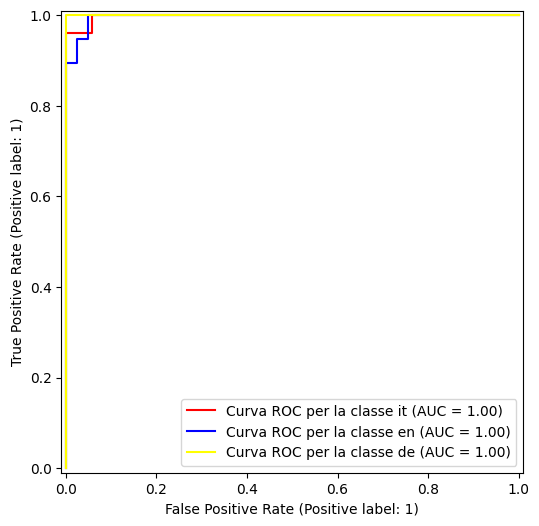

In [ ]:
plot_roc_curve(mnb, (test_descriptions_cleaned_and_vectorized, y_test))

#### <font color="green">**Matrice di Confusione per visualizzare e confrontare le performance del modello**</font>

Tramite la metrica di classificazione "Matrice di Confusione" è possibile sapere non solo quanti errori ha commesso il modello, ma anche quali. Riassume quindi le performance del modello. Si utilizza la funzione confusion_matrix, del modulo sklearn.metrics, applicandola sulle classi

In [ ]:
def plot_confusion_matrix(model, data):

  """
  parametri:
    - model: modello Multinomial Naive Bayes
    - data: tupla contenente il set di feature e target
  output: matrice di confusione
  """

  # estrazione dei dati (feature e target) dalla tupla
  X, y = data

  # previsione del modello
  y_pred = model.predict(X)

  # definizione della matrice di confusione, passando alla funzione due parametri: set di target reali e predetti
  cm = confusion_matrix(y, y_pred)

  # lista con le etichette reali da passare alle classi predette e reali nell'heatmap
  label_names = ["it", "en", "de"]

  # con seaborn.heatmap è possibile visualizzare a livello grafico la matrice di confusione e i valori di True Positive, True Negative, False Positive e False Negative
  # fmt='d' permette di evitare i float
  sns.heatmap(pd.DataFrame(cm), annot=True, fmt='d', xticklabels=label_names, yticklabels=label_names)
  plt.title("Matrice di Confusione")
  plt.ylabel("Classe Reale")
  plt.xlabel("Classe Predetta")
  plt.show()

Nel caso dei dati del set di addestramento si può notare che la matrice di confusione multi-classe=3 è ben distribuita, con tutti Veri Positivi, cioè tutte osservazioni positive classificate come positive

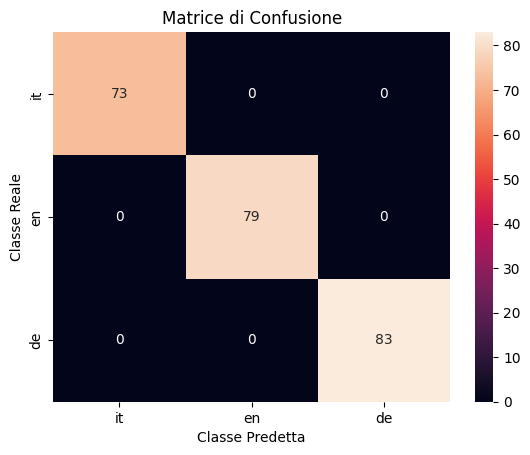

In [ ]:
plot_confusion_matrix(mnb, (train_descriptions_cleaned_and_vectorized, y_train))

Nel caso dei dati del set di test si può notare che la matrice di confusione multi-classe=3 è ben distribuita, con valori elevati sulla diagonale:

* *True Positive*->Osservazioni positive, classificate come positive:
  * *Classe it* ([0,0]): 22
  * *Classe en* ([1,1]): 19
  * *Classe de* ([2,2]): 15
* *False Negative*->Osservazioni positive, classificate come negative:
  * *Classe it* ([0,1], [0,2]): 2, 1
* *False Positive*->Osservazioni negative, classificate come positive:
  * *Classe en* ([0,1]): 2
  * *Classe de* ([0,2]): 1



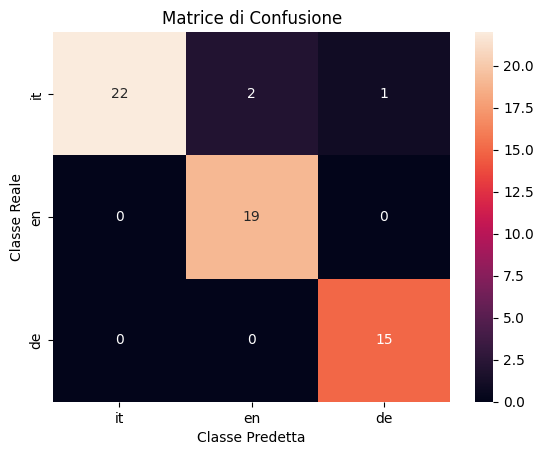

In [ ]:
plot_confusion_matrix(mnb, (test_descriptions_cleaned_and_vectorized, y_test))